In [1]:
# importing libraries
import pandas as pd
import numpy as np

# import datetime library to convert into datetime str objects
from datetime import datetime

# import matplotlib library for plotting graphs
import matplotlib as mpl
import matplotlib.pyplot as plt

# import designer library for style grids
import seaborn as sns

%matplotlib inline
import plotly.graph_objects as go

In [2]:
# special commands for the representation
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

sns.set(style="darkgrid")

Explorative Data Analysis

 - Visual representation of the data set

In [3]:
df_plot=pd.read_csv(r"D:\EDS\ads_covid_19\data\processed\COVID_small_flat_table.csv",sep=';')
df_plot.drop('Unnamed: 0', axis=1, inplace=True)
df_plot.sort_values('date',ascending=False).head()

,date,Italy,US,Spain,Germany,"Korea, South"
884,2022-06-24,18128044,86909716,12681820,27771111,18319773
883,2022-06-23,18071634,86757621,12613634,27681775,18312993
882,2022-06-22,18014202,86636306,12613634,27573585,18305783
881,2022-06-21,17959329,86452232,12613634,27454225,18298341
880,2022-06-20,17896065,86297081,12563399,27334993,18289373


Matplotlib Example

<Figure size 1152x648 with 0 Axes>

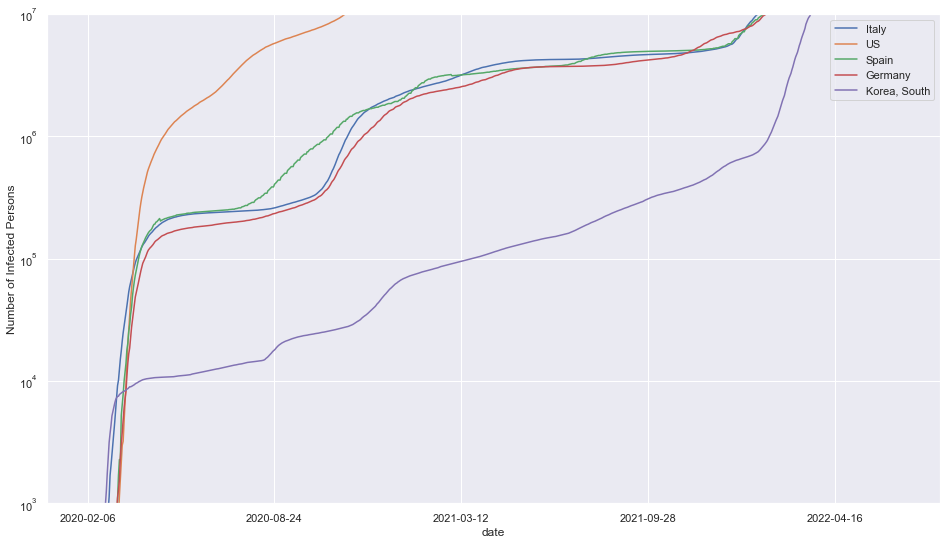

In [4]:
plt.figure();
ax=df_plot.iloc[15:,:].set_index('date').plot()
plt.ylabel("Number of Infected Persons", labelpad=2)
plt.ylim(1000,10000000)
ax.set_yscale('log')

Dataset with "Plot.ly"

In [5]:
import plotly.graph_objects as go

In [6]:
import plotly
plotly.__version__

'5.9.0'

In [7]:
country_list=['US',
              'Germany',
              'Italy',
             ]

In [8]:
fig = go.Figure()

In [9]:
# defines how to plot the individual trace
for each in country_list:
    fig.add_trace(go.Scatter(x=df_plot.date,
                                y=df_plot[each],
                                mode='lines',
                                opacity=0.8,
                                line_width=1,
                                marker_size=2, 
                                name=each
                                 )
                     )

# defines the overall layout properties
fig.update_layout(
    width=1024,
    height=900,
    xaxis_title="Time",
    yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
)

fig.update_yaxes(type="log",range=[6.5,8.5])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()